# ML Assignment 5
Simple operations demonstrated, tasks below main code.

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.datasets import fetch_openml

df = sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<AxesSubplot:>

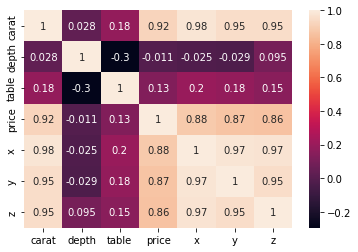

In [5]:
sns.heatmap(df.corr(),annot = True)

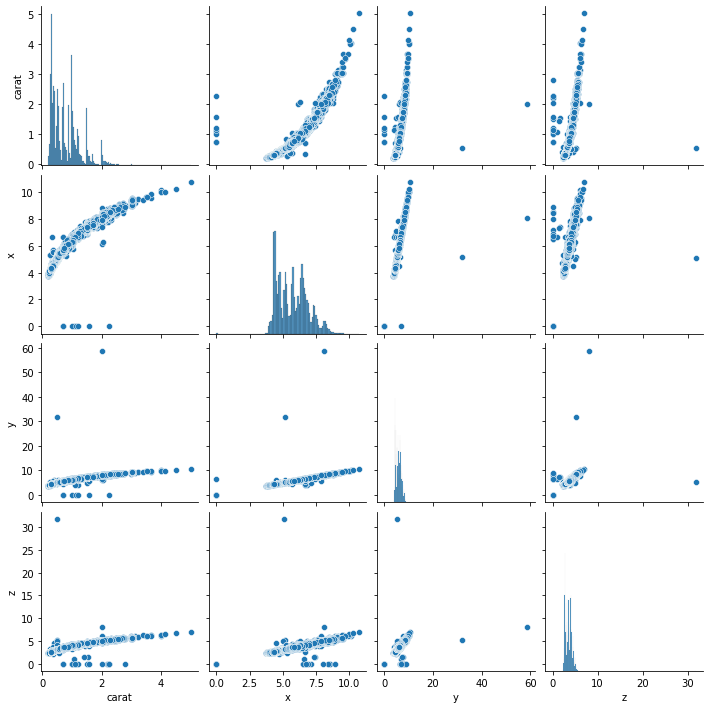

In [6]:
sns.pairplot(df[['carat','x','y','z']])

In [7]:
# BY just Selecting the important ones
X = df[['x','y','z']]
X_features = ['x','y','z']
Xarr = X.values.reshape((-1, 1))
y = df['carat']

In [8]:
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,  test_size= .15)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(45849, 3) (8091, 3) (45849,) (8091,)


In [10]:
sgdr = SGDRegressor(alpha = 0.001, verbose = 1)
sgdr.fit(xtrain, ytrain)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")


-- Epoch 1
Norm: 0.29, NNZs: 3, Bias: -1.213392, T: 45849, Avg. loss: 0.018290
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.33, NNZs: 3, Bias: -1.438072, T: 91698, Avg. loss: 0.006642
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.34, NNZs: 3, Bias: -1.514684, T: 137547, Avg. loss: 0.005716
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.35, NNZs: 3, Bias: -1.543969, T: 183396, Avg. loss: 0.005572
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.35, NNZs: 3, Bias: -1.556247, T: 229245, Avg. loss: 0.005534
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.35, NNZs: 3, Bias: -1.561940, T: 275094, Avg. loss: 0.005516
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 0.35, NNZs: 3, Bias: -1.564895, T: 320943, Avg. loss: 0.005518
Total training time: 0.03 seconds.
Convergence after 7 epochs took 0.03 seconds
SGDRegressor(alpha=0.001, verbose=1)
number of iterations completed: 7, number of weight updates: 320944.0


In [11]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:\n w: {w_norm}, \n b:{b_norm}")

model parameters:
 w: [0.30901371 0.00045289 0.16605782], 
 b:[-1.56489478]


In [12]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(xtest)

# make a prediction using w,b. 
y_pred = np.dot(xtest, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on test set:\n{y_pred[:10].round(2)}" )
print(f"Target values \n{ytest[:10].values}")

prediction using np.dot() and sgdr.predict match: True
Prediction on test set:
[1.01 0.6  0.25 1.5  0.2  1.52 0.64 0.23 0.23 0.61]
Target values 
[0.9  0.55 0.33 1.56 0.3  1.5  0.57 0.31 0.31 0.55]


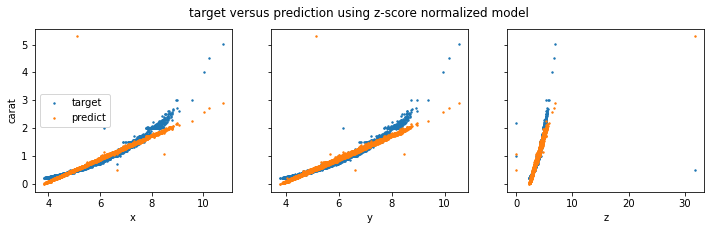

In [13]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,3,figsize=(12,3),sharey=True)
for i,col in enumerate(X_features):
    ax[i].scatter(xtest[col],ytest, label = 'target', s=2)
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(xtest[col],y_pred, label = 'predict', s=2)
ax[0].set_ylabel("carat"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [14]:
X = df['x'].values
x = np.c_[X, X**2]

xtrain,xtest,ytrain,ytest = train_test_split(x,y,  test_size= .15)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(45849, 2) (8091, 2) (45849,) (8091,)


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
xtrainsc = sc.transform(xtrain)
xtestsc = sc.transform(xtest)

sgdr.fit(xtrainsc, ytrain)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:\n w: {w_norm}, \n b:{b_norm}")

-- Epoch 1
Norm: 0.39, NNZs: 2, Bias: 0.797195, T: 45849, Avg. loss: 0.004132
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.45, NNZs: 2, Bias: 0.797574, T: 91698, Avg. loss: 0.002302
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.51, NNZs: 2, Bias: 0.797997, T: 137547, Avg. loss: 0.001949
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.56, NNZs: 2, Bias: 0.798295, T: 183396, Avg. loss: 0.001711
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.60, NNZs: 2, Bias: 0.797190, T: 229245, Avg. loss: 0.001541
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.64, NNZs: 2, Bias: 0.799422, T: 275094, Avg. loss: 0.001416
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 0.67, NNZs: 2, Bias: 0.797110, T: 320943, Avg. loss: 0.001318
Total training time: 0.03 seconds.
Convergence after 7 epochs took 0.03 seconds
SGDRegressor(alpha=0.001, verbose=1)
number of iterations completed: 7, number of weight updates: 320944.0
model parameters:
 w: [-0.17725314  0.64476285], 
 b

In [16]:
sgdr.score(xtestsc,ytest)

0.9900562783522043

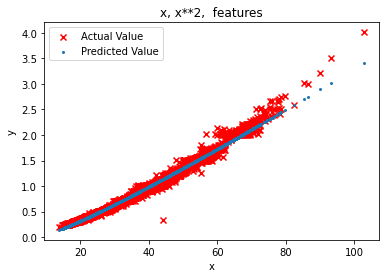

In [17]:
ypred = sgdr.predict(xtestsc) 
plt.scatter(xtest[:,1], ytest, marker='x', c='r', label="Actual Value"); plt.title("x, x**2,  features")
plt.scatter(xtest[:,1],ypred, label="Predicted Value", s = 4); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

# Task: 1
1: add another polynomial degree 𝑥^3 and explain which is a better fit with better score

In [31]:
X = df['x'].values
x = np.c_[X, X**2,X**3]

xtrain,xtest,ytrain,ytest = train_test_split(x,y,  test_size= .15)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(45849, 3) (8091, 3) (45849,) (8091,)


In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
xtrainsc = sc.transform(xtrain)
xtestsc = sc.transform(xtest)

sgdr.fit(xtrainsc, ytrain)

-- Epoch 1
Norm: 0.33, NNZs: 3, Bias: 0.799067, T: 45849, Avg. loss: 0.002526
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.37, NNZs: 3, Bias: 0.799834, T: 91698, Avg. loss: 0.000972
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.39, NNZs: 3, Bias: 0.799453, T: 137547, Avg. loss: 0.000888
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.40, NNZs: 3, Bias: 0.798679, T: 183396, Avg. loss: 0.000861
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.41, NNZs: 3, Bias: 0.798396, T: 229245, Avg. loss: 0.000851
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.41, NNZs: 3, Bias: 0.798808, T: 275094, Avg. loss: 0.000845
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 0.41, NNZs: 3, Bias: 0.799103, T: 320943, Avg. loss: 0.000843
Total training time: 0.04 seconds.
Convergence after 7 epochs took 0.04 seconds


SGDRegressor(alpha=0.001, verbose=1)

In [33]:
sgdr.score(xtestsc,ytest)

0.9909015545073412

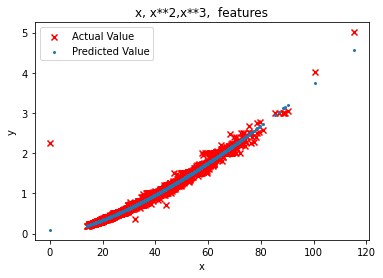

In [35]:
ypred = sgdr.predict(xtestsc) 
plt.scatter(xtest[:,1], ytest, marker='x', c='r', label="Actual Value"); plt.title("x, x**2,x**3,  features")
plt.scatter(xtest[:,1],ypred, label="Predicted Value", s = 4); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

We added another Polynomial of degree 3, and our score was 0.9909015545073412, which is a better score than with a polynomial of degree 2 of 0.9859242956320872, therefore degree 3 is better in terms of score, and a better fit but the fit for degree 2 is less resource intensive.

# Task: 2
2: redo this lab for y and z features

In [51]:
# BY just Selecting the important ones
X = df[['y','z']]
X_features = ['y','z']
Xarr = X.values.reshape((-1, 1))
y = df['carat']

In [52]:
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# scaling feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
xtrainsc = sc.transform(xtrain)
xtestsc = sc.transform(xtest)

In [54]:
sgdr = SGDRegressor(alpha = 0.5, verbose = 1, max_iter=100000)
sgdr.fit(xtrainsc, ytrain)
print(sgdr)

-- Epoch 1
Norm: 0.24, NNZs: 3, Bias: 0.799391, T: 45849, Avg. loss: 0.005352
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.23, NNZs: 3, Bias: 0.798741, T: 91698, Avg. loss: 0.004200
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.24, NNZs: 3, Bias: 0.798507, T: 137547, Avg. loss: 0.004206
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.23, NNZs: 3, Bias: 0.799041, T: 183396, Avg. loss: 0.004196
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.24, NNZs: 3, Bias: 0.799961, T: 229245, Avg. loss: 0.004203
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.24, NNZs: 3, Bias: 0.800757, T: 275094, Avg. loss: 0.004198
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 0.23, NNZs: 3, Bias: 0.798769, T: 320943, Avg. loss: 0.004187
Total training time: 0.04 seconds.
Convergence after 7 epochs took 0.04 seconds
SGDRegressor(alpha=0.5, max_iter=100000, verbose=1)


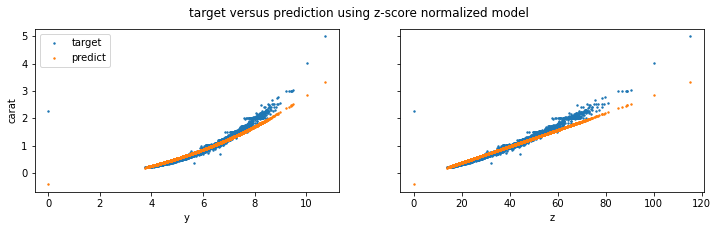

In [55]:
# plot predictions and targets vs original features 
y_pred = sgdr.predict(xtestsc)
fig,ax=plt.subplots(1,2,figsize=(12,3),sharey=True)
for i,col in enumerate(X_features):
    ax[i].scatter(xtest[:,i],ytest, label = 'target', s=2)
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(xtest[:,i],y_pred, label = 'predict', s=2)
ax[0].set_ylabel("carat"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

## for y

In [56]:
X = df['y'].values
x = np.c_[X, X**2,X**3,]


print(xtrain.min(),xtest.min(),ytrain.min(),ytest.min())
print(xtrain.max(),xtest.max(),ytrain.max(),ytest.max())

0.0 0.0 0.2 0.2
1070.599167 1238.833224 4.5 5.01


In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
xtrainsc = sc.transform(xtrain)
xtestsc = sc.transform(xtest)

sgdr.fit(xtrainsc, ytrain)
print(sgdr)

-- Epoch 1
Norm: 0.23, NNZs: 3, Bias: 0.797514, T: 45849, Avg. loss: 0.005407
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.23, NNZs: 3, Bias: 0.801390, T: 91698, Avg. loss: 0.004204
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.23, NNZs: 3, Bias: 0.800206, T: 137547, Avg. loss: 0.004193
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.24, NNZs: 3, Bias: 0.799496, T: 183396, Avg. loss: 0.004204
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.24, NNZs: 3, Bias: 0.799453, T: 229245, Avg. loss: 0.004200
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.24, NNZs: 3, Bias: 0.799958, T: 275094, Avg. loss: 0.004197
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 0.23, NNZs: 3, Bias: 0.799164, T: 320943, Avg. loss: 0.004193
Total training time: 0.04 seconds.
Convergence after 7 epochs took 0.04 seconds
SGDRegressor(alpha=0.5, max_iter=100000, verbose=1)


In [62]:
sgdr.score(xtestsc,ytest)

0.9615393275167917

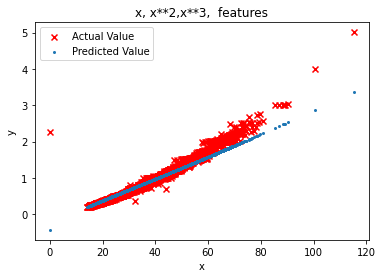

In [63]:
ypred = sgdr.predict(xtestsc) 
plt.scatter(xtest[:,1], ytest, marker='x', c='r', label="Actual Value"); plt.title("x, x**2,x**3,  features")
plt.scatter(xtest[:,1],ypred, label="Predicted Value", s = 4); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

## for z

In [82]:
X = df['z'].values
x = np.c_[X, X**2,X**3,]


print(xtrain.min(),xtest.min(),ytrain.min(),ytest.min())
print(xtrain.max(),xtest.max(),ytrain.max(),ytest.max())

0.0 0.0 0.2 0.21
115.3476 104.6529 5.01 4.5


In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
xtrainsc = sc.transform(xtrain)
xtestsc = sc.transform(xtest)

sgdr.fit(xtrainsc, ytrain)
print(sgdr)

-- Epoch 1
Norm: 0.27, NNZs: 2, Bias: 0.800789, T: 45849, Avg. loss: 0.008956
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.26, NNZs: 2, Bias: 0.794589, T: 91698, Avg. loss: 0.007696
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.27, NNZs: 2, Bias: 0.798777, T: 137547, Avg. loss: 0.007732
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.27, NNZs: 2, Bias: 0.800720, T: 183396, Avg. loss: 0.007718
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.26, NNZs: 2, Bias: 0.796920, T: 229245, Avg. loss: 0.007697
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.27, NNZs: 2, Bias: 0.799674, T: 275094, Avg. loss: 0.007716
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 0.27, NNZs: 2, Bias: 0.802579, T: 320943, Avg. loss: 0.007730
Total training time: 0.03 seconds.
Convergence after 7 epochs took 0.03 seconds
SGDRegressor(alpha=0.5, max_iter=100000, verbose=1)


In [84]:
sgdr.score(xtestsc,ytest)

0.9369418639470407

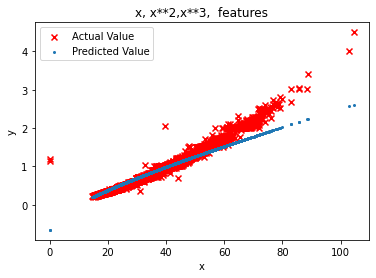

In [85]:
ypred = sgdr.predict(xtestsc) 
plt.scatter(xtest[:,1], ytest, marker='x', c='r', label="Actual Value"); plt.title("x, x**2,x**3,  features")
plt.scatter(xtest[:,1],ypred, label="Predicted Value", s = 4); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

# Task: 3
3: what happens without feature scaling?

# with scaling

In [123]:
X = df['x'].values
x = np.c_[X, X**2]

xtrain,xtest,ytrain,ytest = train_test_split(x,y,  test_size= .15)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(45849, 2) (8091, 2) (45849,) (8091,)


In [124]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
xtrainsc = sc.transform(xtrain)
xtestsc = sc.transform(xtest)

In [125]:
sgdr.fit(xtrainsc, ytrain)
sgdr.score(xtestsc,ytest)

-- Epoch 1
Norm: 0.27, NNZs: 2, Bias: 0.801722, T: 45849, Avg. loss: 0.009089
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.26, NNZs: 2, Bias: 0.797969, T: 91698, Avg. loss: 0.007850
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.26, NNZs: 2, Bias: 0.799363, T: 137547, Avg. loss: 0.007863
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.26, NNZs: 2, Bias: 0.798934, T: 183396, Avg. loss: 0.007870
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.26, NNZs: 2, Bias: 0.800350, T: 229245, Avg. loss: 0.007855
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 0.26, NNZs: 2, Bias: 0.800072, T: 275094, Avg. loss: 0.007866
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 0.27, NNZs: 2, Bias: 0.799588, T: 320943, Avg. loss: 0.007868
Total training time: 0.04 seconds.
Convergence after 7 epochs took 0.04 seconds


0.9348934597429364

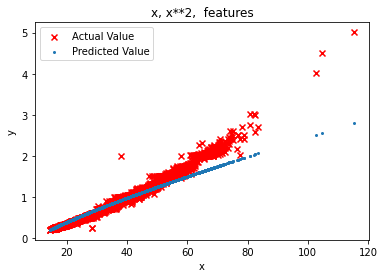

In [126]:
ypred = sgdr.predict(xtestsc) 
plt.scatter(xtest[:,1], ytest, marker='x', c='r', label="Actual Value"); plt.title("x, x**2,  features")
plt.scatter(xtest[:,1],ypred, label="Predicted Value", s = 4); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

# without scaling

In [127]:
# without scaling 
X = df['x'].values
x = np.c_[X, X**2]

xtrain,xtest,ytrain,ytest = train_test_split(x,y,  test_size= .15)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(45849, 2) (8091, 2) (45849,) (8091,)


In [128]:
sgdr.fit(xtrain, ytrain)
print(sgdr)

-- Epoch 1
Norm: 53334385.94, NNZs: 2, Bias: -216460347.952531, T: 45849, Avg. loss: 23475747058132602322944.000000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 16948792.34, NNZs: 2, Bias: -69791233.638992, T: 91698, Avg. loss: 245312295711588.500000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 6276692.24, NNZs: 2, Bias: -25812544.564214, T: 137547, Avg. loss: 22879537665876.019531
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 2524934.58, NNZs: 2, Bias: -10347742.647533, T: 183396, Avg. loss: 3042172334086.013184
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1075536.43, NNZs: 2, Bias: -4386066.462285, T: 229245, Avg. loss: 483730966266.817505
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 469336.17, NNZs: 2, Bias: -1943113.390216, T: 275094, Avg. loss: 87027480615.865585
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 215392.25, NNZs: 2, Bias: -889369.581903, T: 320943, Avg. loss: 17224567090.430874
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 

In [129]:
sgdr.score(xtestsc,ytest)

-6.159404000140171

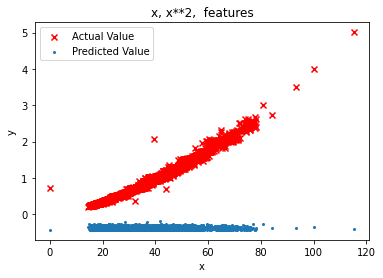

In [130]:
ypred = sgdr.predict(xtestsc) 
plt.scatter(xtest[:,1], ytest, marker='x', c='r', label="Actual Value"); plt.title("x, x**2,  features")
plt.scatter(xtest[:,1],ypred, label="Predicted Value", s = 4); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

It seems that without scaling features, the gradient descent is not stepping towards the minima but rather away from the minima